In [82]:
#pip install jupyter

#pip install scikit-learn
#pip install pandas
#pip install numpy


In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import calinski_harabasz_score, silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [84]:
df = pd.read_csv('Tsunami.csv')
df.head()

,Date,Latitude,Longitude,Magnitude,Depth,Location
0,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...
1,2023-04-25 03:00:57,98.39,-0.93,7.3,84 Km,177 km BaratLaut KEP-MENTAWAI-SUMBAR(Warning T...
2,2023-01-10 00:47:33,130.23,-7.37,7.5,130 Km,136 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...
3,2023-01-10 00:47:34,130.18,-7.25,7.9,131 Km,148 km BaratLaut MALUKUTENGGARABRT(Warning Tsu...
4,2021-12-14 10:20:23,122.24,-7.59,7.4,10 Km,113 km BaratLaut LARANTUKA-NTT(Warning Tsunami...


In [85]:
df["Depth"] = df["Depth"].replace("[^0-9.]", "", regex=True).astype(float)
calc = df[['Latitude', 'Longitude', 'Magnitude', 'Depth']]
dl = df[['Date', 'Location']]
numeric_df = df.drop(['Date', 'Location'], axis=1)
string_df = df.drop(['Latitude', 'Longitude', 'Magnitude', 'Depth'], axis=1)
scaler = StandardScaler()
scaled_data1 = scaler.fit_transform(numeric_df)

In [86]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_features[['Latitude', 'Longitude', 'Magnitude', 'Depth']])
principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

def plot_clusters(df, labels, title):
    plt.scatter(df['PC1'], df['PC2'], c=labels, cmap='viridis', marker='o', edgecolor='k')
    plt.title(title)
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.show()

D:\forum week 9 sem 3 data science\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


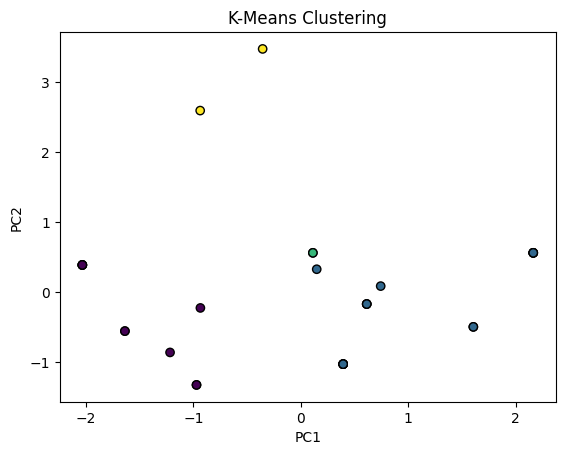

In [87]:
kmeans = KMeans(n_clusters=4, random_state=42)
k_labels = kmeans.fit_predict(scaled_data1)
plot_clusters(principal_df, k_labels, 'K-Means Clustering')

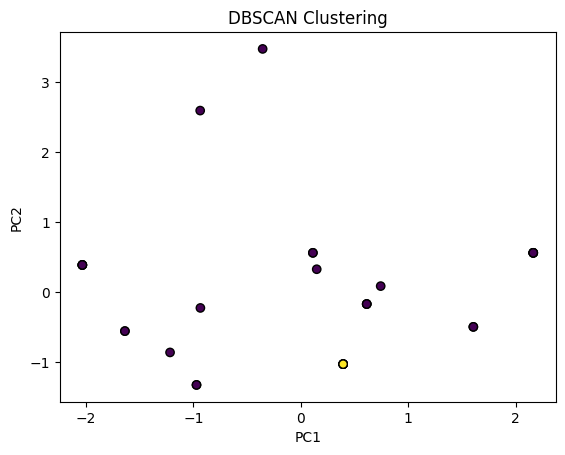

In [88]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(scaled_data1)
plot_clusters(principal_df, db_labels, 'DBSCAN Clustering')

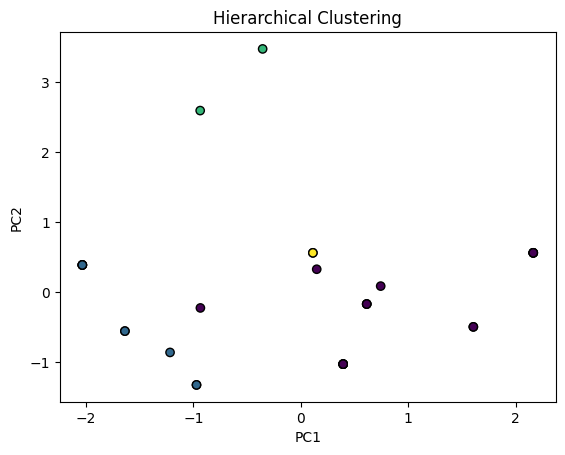

In [89]:
agg_cluster = AgglomerativeClustering(n_clusters=4)
agg_labels = agg_cluster.fit_predict(scaled_data1)
plot_clusters(principal_df, agg_labels, 'Hierarchical Clustering')

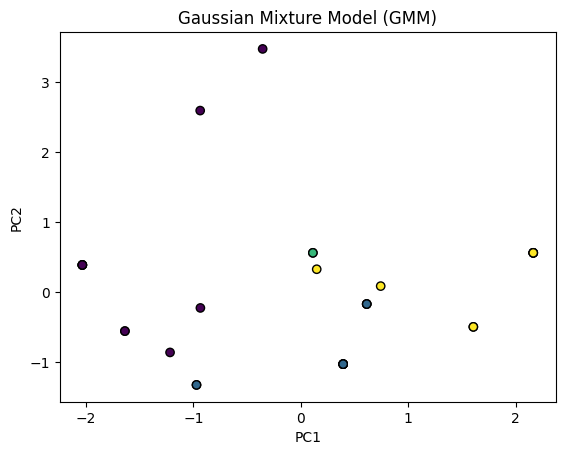

In [90]:
gmm = GaussianMixture(n_components=4, random_state=42)
gmm_labels = gmm.fit_predict(scaled_data1)
plot_clusters(principal_df, gmm_labels, 'Gaussian Mixture Model (GMM)')


In [91]:
silhouette = [silhouette_score(scaled_data1, label) for label in [k_labels, db_labels, agg_labels, gmm_labels]]
calinski_harabasz_score = [calinski_harabasz_score(scaled_data1, label) for label in [k_labels, db_labels, agg_labels, gmm_labels]]

In [92]:
print("Clustering Methods    : KMeans, DBSCAN, AgglomerativeClustering , GaussianMixture")
print("Silhouette Scores     :", silhouette)
print("Calinski Harabasz Scores:", calinski_harabasz_score)

Clustering Methods    : KMeans, DBSCAN, AgglomerativeClustering , GaussianMixture
Silhouette Scores     : [0.5090369947767559, 0.10014465661112155, 0.47886290855912583, 0.40125386845547245]
Calinski Harabasz Scores: [19.291570547326245, 3.1132165649600494, 16.770945394740693, 14.158208583939315]
